### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../../")
sys.path.append("../../basis/")
sys.path.append("../../estimators")
sys.path.append("../../estimators/trend_filtering")
sys.path.append("../../estimators/trend_filtering/helpers")
sys.path.append("../../model_selection")


### basis functions
from continous_tf import Continous_TF
from falling_factorial_gen import Falling_Factorial_Basis

### model_selection
from cv_base_estimator import cv_base_estimator

### estimators
from trend_filter import Trend_Filter

### helpers
from difference_matrix import Difference_Matrix


### Generate Noisy Data

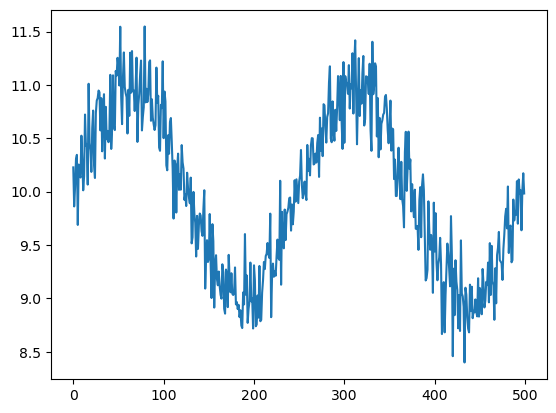

In [2]:
x=np.linspace(0, 2 * np.pi, 500)
noisy_signal =np.sin(2*x) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem solved with Primal Dual Interior Point Method

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [3]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='primal_dual')


cv_base_estimator(tf)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.1885582478154874
Performing cross validation for lambda = 0.3640489808195665
Performing cross validation for lambda = 0.7028685404705987
Performing cross validation for lambda = 1.3570266947900709
Performing cross validation for lambda = 2.620008357665132
Performing cross validation for lambda = 5.058444185799203
Performing cross validation for lambda = 9.76632670120521
Performing cross validation for lambda = 18.85582478154874
Performing cross validation for lambda = 36.404898081956645
Performing cross validation for lambda = 70.28685404705988
Performing cross validation for lambda = 135.70266947900694
Performing cross validation for lambda = 262.00083576651326
Performing cross validation for lambda = 505.8444185799204
Performing cross validation for lambda = 976.6326701205202
Performing cross validation for lambda = 1885.582478154874
Performing  1 out of 3 iterations of cross validation
P

{'lambda_': 0.1877466103652083}

### Let's Visualize results

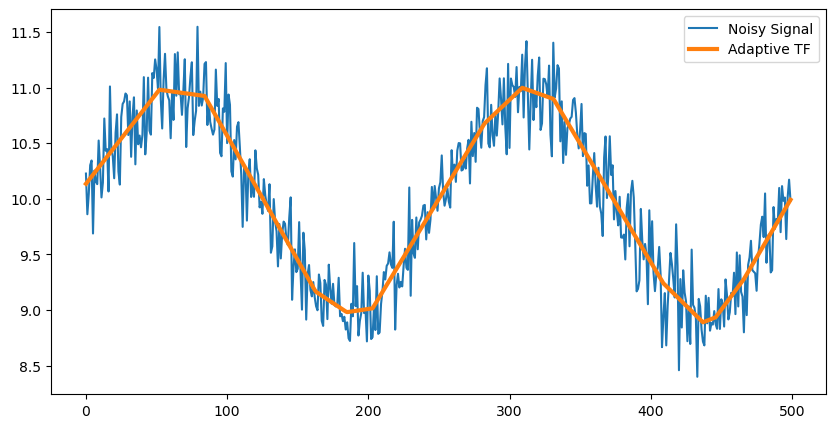

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)

ax.legend()


### Same problem solved with ADMM

In [5]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='admm')

cv_base_estimator(tf)


Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.21913643628961127
Performing cross validation for lambda = 0.4230862198599214
Performing cross validation for lambda = 0.8168516038053494
Performing cross validation for lambda = 1.5770935363016299
Performing cross validation for lambda = 3.0448909087740095
Performing cross validation for lambda = 5.878763962267234
Performing cross validation for lambda = 11.350116230590054
Performing cross validation for lambda = 21.913643628961125
Performing cross validation for lambda = 42.30862198599214
Performing cross validation for lambda = 81.68516038053495
Performing cross validation for lambda = 157.7093536301628
Performing cross validation for lambda = 304.48909087740094
Performing cross validation for lambda = 587.8763962267234
Performing cross validation for lambda = 1135.0116230590043
Performing cross validation for lambda = 2191.3643628961127
Performing  1 out of 3 iterations of cross validat

{'lambda_': 1.3511854563436987}

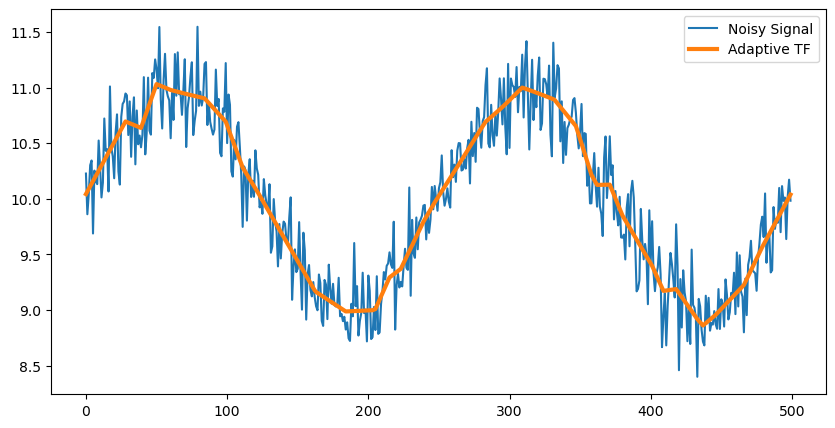

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.legend()

### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [7]:
x_tf=tf.y_hat

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [8]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [9]:
D=tf.D

ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[10.04297529]
 [ 1.85076904]]
Number of theta coefficients: 498
Theta coefficients: [[-9.66875309e-04]
 [-9.46454550e-04]
 [-9.02614122e-04]
 [-8.32382842e-04]
 [-7.33281267e-04]
 [-6.03642810e-04]
 [-4.42947765e-04]
 [-2.52165126e-04]
 [-3.40835252e-05]
 [ 2.06402290e-04]
 [ 4.62095808e-04]
 [ 7.23448043e-04]
 [ 9.78705557e-04]
 [ 1.21430119e-03]
 [ 1.41551166e-03]
 [ 1.56737795e-03]
 [ 1.65584978e-03]
 [ 1.66907956e-03]
 [ 1.59875677e-03]
 [ 1.44134744e-03]
 [ 1.19908856e-03]
 [ 8.80587542e-04]
 [ 5.00896131e-04]
 [ 8.09644080e-05]
 [-3.53566073e-04]
 [-7.74205591e-04]
 [-1.15199623e-03]
 [-2.27143984e+00]
 [-1.50693172e-03]
 [-1.46274129e-03]
 [-1.33569978e-03]
 [-1.14097857e-03]
 [-8.99532498e-04]
 [-6.36001211e-04]
 [-3.75985806e-04]
 [-1.42923370e-04]
 [ 4.51119909e-05]
 [ 1.78261686e-04]
 [ 3.26371303e+00]
 [ 2.45721656e-04]
 [ 2.14907255e-04]
 [ 1.93515590e-04]
 [ 2.10247740e-04]
 [ 2.87047659e-04]
 [ 4.33347138e-04]
 [ 6.4226869

In [10]:
x_tf[0]-x_tf[1]

array([-0.02330406])

In [11]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [105.55]])

### Let's Visualize the Coefficients

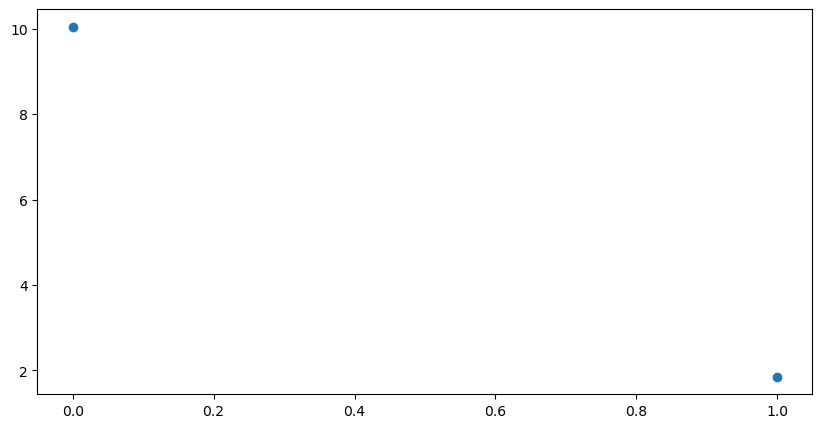

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

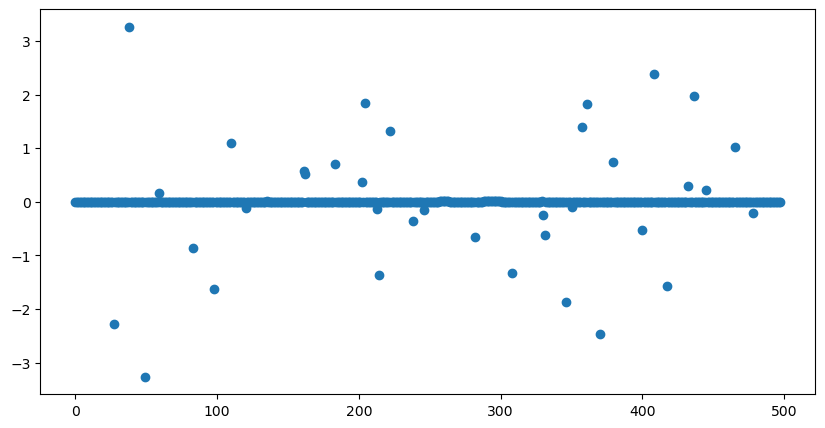

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

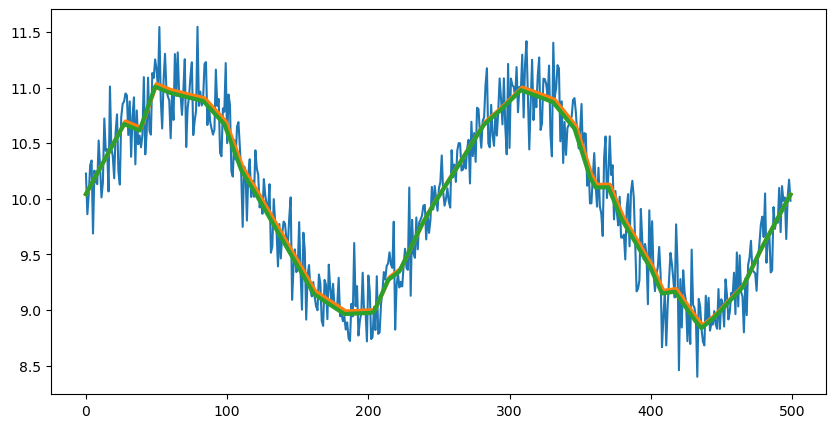

In [14]:
x_equal=x

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
